In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
import pandas as pd
import wordcloud

spark = SparkSession.builder.appName('abc').getOrCreate()

df=spark.read.csv('UScomments.csv',header=True)
df.show()

+-----------+--------------------+-----+-------+
|   video_id|        comment_text|likes|replies|
+-----------+--------------------+-----+-------+
|XpVt6Z1Gjjo|Logan Paul it's y...|    4|      0|
|XpVt6Z1Gjjo|I've been followi...|    3|      0|
|XpVt6Z1Gjjo|Say hi to Kong an...|    3|      0|
|XpVt6Z1Gjjo| MY FAN . attendance|    3|      0|
|XpVt6Z1Gjjo|         trending 😉|    3|      0|
|XpVt6Z1Gjjo|#1 on trending AY...|    3|      0|
|XpVt6Z1Gjjo|The end though 😭...|    4|      0|
|XpVt6Z1Gjjo|#1 trending!!!!!!!!!|    3|      0|
|XpVt6Z1Gjjo|Happy one year vl...|    3|      0|
|XpVt6Z1Gjjo|You and your shit...|    0|      0|
|XpVt6Z1Gjjo|There should be a...|    0|      0|
|XpVt6Z1Gjjo|Dear Logan, I rea...|    0|      0|
|XpVt6Z1Gjjo|Honestly Evan is ...|    0|      0|
|XpVt6Z1Gjjo|Casey is still be...|    0|      0|
|XpVt6Z1Gjjo|aw geez rick this...|    0|      0|
|XpVt6Z1Gjjo|He happy cause he...|    0|      0|
|XpVt6Z1Gjjo|Ayyyyoooo Logang ...|    1|      0|
|XpVt6Z1Gjjo|Bro y did

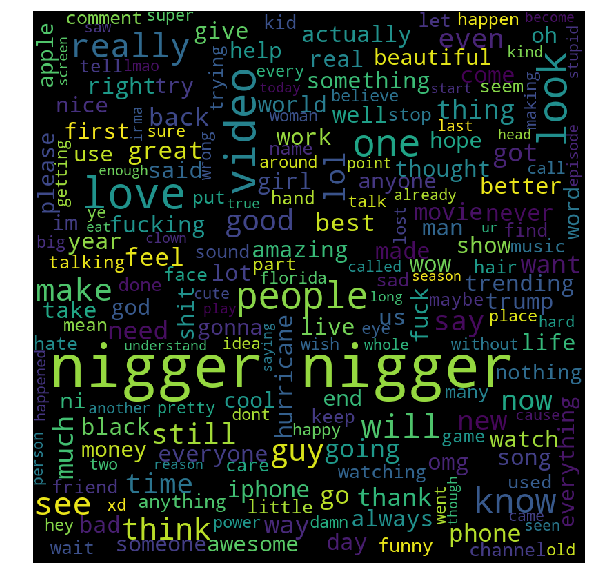

In [4]:
from wordcloud import WordCloud, STOPWORDS

df.createOrReplaceTempView("comments")
df1 = spark.sql("select comment_text from comments limit 10000")
comments = df1.select("comment_text").rdd.flatMap(lambda x: x).collect()
comment_words = ' '
stopwords = set(STOPWORDS)
for i in range(len(comments)):
    yourstring = comments[i].encode('ascii', 'ignore').decode('ascii')
    tokens = yourstring.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    for words in tokens:
        comment_words = comment_words + words + ' '
        

wordcloud = WordCloud(width = 800, height = 800, 
background_color ='black', 
stopwords = stopwords, 
min_font_size = 10).generate(comment_words) 


plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
    
    

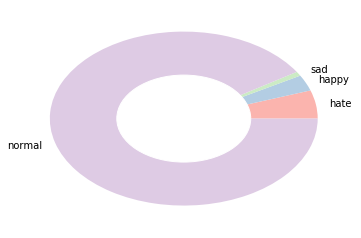

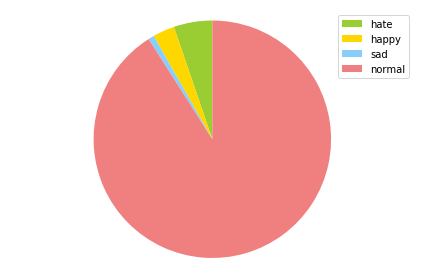

In [9]:
from palettable.colorbrewer.qualitative import Pastel1_7

classification_list = []
good_str = 0
bad_str = 0
happy_str = 0
sad_str = 0
comment_dict = {}
for i in range(len(comments)):
    yourstring = comments[i].encode('ascii', 'ignore').decode('ascii')
    if 'fuck' in yourstring or 'nigger' in yourstring or 'shit' in yourstring or 'fucking' in yourstring or 'dick' in yourstring or 'hell' in yourstring or 'scum' in yourstring or 'faggot' in yourstring or 'cunt' in yourstring or 'whore' in yourstring or 'bitch' in yourstring or 'shemale' in yourstring or 'slut' in yourstring or 'chink' in yourstring or 'negro' in yourstring:
        bad_str += 1
        classification_list.append(yourstring)
    elif 'excited' in yourstring or 'happy' in yourstring or 'great' in yourstring or 'awesome' in yourstring:
        happy_str +=1
    elif 'sad' in yourstring  or 'disappointed' in yourstring: 
        sad_str +=1
    else:
        good_str += 1
        
names = 'hate','happy', 'sad','normal',
size=[bad_str,happy_str,sad_str,good_str]
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

labels = ['hate', 'happy', 'sad', 'normal']
sizes = [bad_str,happy_str,sad_str,good_str]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()